<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h1>Which Factors Impact House Prices? A Data Science Perspective</h1>

Ritu Pomaje

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2> Workflow for House Price Analysis  </h2>


**High Level Steps**
- Data Preparation

Drop irrelevant or highly missing columns.

Impute missing values.

- Feature Engineering

Create and refine new features.

Remove redundant ones.

- Data Transformation

Apply scaling and transformations.

- Model Development

Train models and select features using p-values.

- Analysis

Interpret feature impact on house prices.


**Features created that we have used to build the model**

Buyer Type (C) – Categorizing buyers based on sale conditions.

Bath to Bed Ratio (N) – Ratio of bathrooms to bedrooms for livability.

Neighbor Score (N) – Assessing the impact of neighborhood on price.

Utilities Score (N) – Evaluating available public utilities and infrastructure.

Luxury Score (N) – Capturing high-end amenities like pools and fireplaces.

External Area (N) – Total outdoor and non-living space.

Quality Rating (C) – Classification based on material and finish quality.

Storage Space (N) – Sum of garage and basement storage.

Storey (C) – Categorizing houses based on the number of floors.

Building Age (N) – Age of the house based on year_sold - year_built.


**Transformations**

Log Transformation – For skewed numerical features.
Scaling – Standardizing data for better model performance.
Square Root Transformation – Reducing impact of extreme values.


**Visuals**

1.1 - Histogram that demonstrates the house price distribution in our dataset

1.2 - Bar Graph to identify the data skewness

1.3 - Correlation Heatmap for checking the correlation of the engineered features with the Sales Price

## Model Introduction
In this notebook I have built a predictive regression model that focuses on estimating house prices through the analysis of structured data. The "House Prices - Advanced Regression Techniques" dataset from Kaggle serves as the source for this analysis which includes various property features such as square footage measurements and room counts along with location-based information. The dataset provides information about house dimensions such as size and room count alongside location and various other property details.

The calculation of house prices involves working with numerical values which exhibit considerable fluctuations. This problem perfectly suits regression analysis because I deal with numerical data that shows significant variation. This model aims to determine how various house characteristics influence their market selling prices. Does the size of a house influence its market value? How about one with more rooms? These discovered relationships between features and prices enable the model to generate more accurate price predictions.

I have made use of Scikit-Learn machine learning tools to build this model. The next step involves preparing the data through cleaning processes. The model selects key features before deciding on the appropriate model. The model preparation requires three key processes: filling in missing data, normalizing numerical values and transforming categorical variables into numerical data. The model's performance is evaluated through various metrics including mean absolute error (MAE), mean squared error (MSE), and R-square score. The primary goal is to build a model that performs effectively on fresh data while maintaining a low error rate and ensuring consistent reliability.

<h2>Step 1: Initial Preparation</h2>
Let's start by importing libraries and the training and testing data.

In [15]:
#########################
## importing libraries ##
#########################
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import sklearn.linear_model     # linear models
import matplotlib.pyplot as plt # data viz
import seaborn           as sns # enhanced data viz
from   sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


########################
## importing datasets ##
########################
# importing the training dataset
#path             = "/kaggle/input/house-prices-advanced-regression-techniques/"

# training set
training_dataset = "train.csv"

# testing set
testing_dataset  = "train.csv"


# reading in the training set
housing_train = pd.read_csv(filepath_or_buffer =  training_dataset)


# reading in the testing set
housing_test = pd.read_csv(filepath_or_buffer = testing_dataset)

## This code will not generate an output ##

In [16]:
# creating new features to indicate original set
housing_train['set'] = 'Training'
housing_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
housing_df = pd.concat([housing_train, housing_test], axis=0)

# resetting index to avoid problems later in the code
housing_df.reset_index(drop = False,
                       inplace = True)


# changing the label for the original indexes
housing_df['original_index'] = housing_df['index']
housing_df.drop(labels = 'index', axis = 1, inplace = True)

# checking results
housing_df.info(verbose = False)
housing_df.head(n = 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Columns: 83 entries, Id to original_index
dtypes: float64(3), int64(36), object(44)
memory usage: 1.8+ MB


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,set,original_index
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,Training,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,Training,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,Training,2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,Training,3
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,Training,4


In [17]:
# Subsetting the DataFrame for numerical values only
numeric_housing = housing_df.select_dtypes(include=['number'])

# Frequency table for features with Zero-Inflation
FreqTable = (numeric_housing == 0).mean().round(4).sort_values(ascending=False)

# Convert Series to DataFrame with appropriate column names
FreqTable = FreqTable.reset_index().rename(columns={'index': 'feature', 0: 'zero_proportion'})

# Display the result
FreqTable.head(n=25)


,feature,zero_proportion
0,PoolArea,0.9952
1,3SsnPorch,0.9836
2,LowQualFinSF,0.9822
3,MiscVal,0.9644
4,BsmtHalfBath,0.9438
5,ScreenPorch,0.9205
6,BsmtFinSF2,0.8856
7,EnclosedPorch,0.8575
8,HalfBath,0.6253
9,MasVnrArea,0.5897


In [18]:
# Compute skewness and convert to a DataFrame
SkewTable = numeric_housing.skew(axis=0).round(2).sort_values(ascending=False)

# Convert Series to DataFrame
SkewTable = SkewTable.reset_index().rename(columns={'index': 'feature', 0: 'skewness_value'})

# Display the DataFrame
SkewTable

,feature,skewness_value
0,MiscVal,24.46
1,PoolArea,14.82
2,LotArea,12.20
3,3SsnPorch,10.30
4,LowQualFinSF,9.01
5,KitchenAbvGr,4.49
6,BsmtFinSF2,4.25
7,ScreenPorch,4.12
8,BsmtHalfBath,4.10
9,EnclosedPorch,3.09


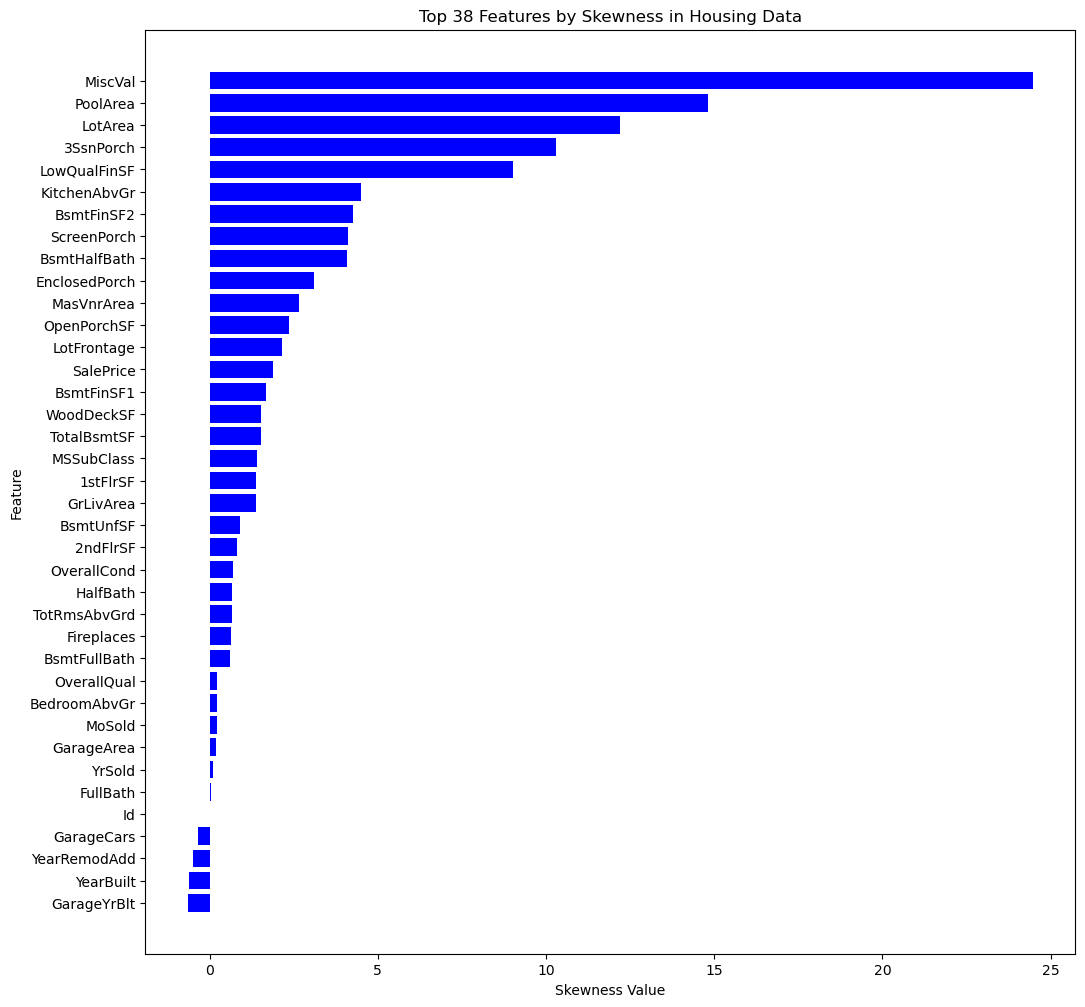

In [62]:
#checking the post skewness graph
# Select only numeric columns
numeric_housing = housing_train.select_dtypes(include=['number'])

# Calculate skewness and convert to a DataFrame
SkewTable = numeric_housing.skew(axis=0).round(2).sort_values(ascending=False).reset_index()
SkewTable.columns = ['feature', 'skewness_value']

# Create bar chart to represent the asymmetry of features
plt.figure(figsize=(12, 12))
plt.barh(SkewTable['feature'][:38], SkewTable['skewness_value'][:38], color='blue')
plt.xlabel("Skewness Value")
plt.ylabel("Feature")
plt.title("Top 38 Features by Skewness in Housing Data")
plt.gca().invert_yaxis()  # Invert axis for better visualization

# Show the graph
plt.show()

<h2> Analysis of the Post Skewness Graph </h2>

- This bar chart shows the skewness of the top 38 features in the house price dataset. MiscVal, PoolArea, and LotArea show the highest skewness, which means that most of their values are very small, with only a few exceptions. 
- Features related to additional living spaces, such as 3SsnPorch, BsmtFinSF2, and ScreenPorch, also have significant skewness. 
- This is probably because most homes don't have these features. SalePrice is ranked in the middle, which means it isn't one of the most extreme cases but is still skewed. 
- Features like FullBath, YrSold, and MoSold have little to no skew, which means their values are spread out more equally.  - Analyzing skewness helps determine whether transformations (such as logarithm or square root to normalize the data) are needed to improve model performance.

In [19]:
# Develop the correlation table
housing_corr = numeric_housing.corr(method='pearson')

# Filter correlations with SalePrice, round and sort
corr_series = housing_corr.loc[:, 'SalePrice'].round(2).sort_values(ascending=False)

# Convert the resulting Series to a DataFrame
corr_df = corr_series.reset_index().rename(columns={'index': 'feature', 'SalePrice': 'correlation'})

# Display the DataFrame
corr_df

,feature,correlation
0,SalePrice,1.00
1,OverallQual,0.79
2,GrLivArea,0.71
3,GarageCars,0.64
4,GarageArea,0.62
5,1stFlrSF,0.61
6,TotalBsmtSF,0.61
7,FullBath,0.56
8,TotRmsAbvGrd,0.53
9,YearBuilt,0.52


<h2> Insights from Exploratory Data Analysis (EDA) </h2>

1.1. Structure of Dataset and Feature Type

- The data consist of both numerical and categorical variables, so there is a necessity for preprocessing them carefully prior to model training.  There are a total of 83 features available in the data, numerical features, categorical, and ordinal features.
- Certain variables such as 'OverallQual' and 'GrLivArea' correlate very strongly with the target variable, 'SalePrice'. They are critical in determining model performance.
- Outliers were identified, particularly in 'GrLivArea', where exceedingly large properties boasted out-of-proportion prices. The removal of outliers helps improve model stability.
- There were missing values in most columns, especially in categorical variables such as 'PoolQC' and 'MiscFeature', where appropriate imputation methods were required

1.2. Correlation Analysis and Significant Predictors

- I have figured out some excellent correlations between SalePrice and features such as:
- OverallQuality (0.79) – Better-quality houses are more expensive.
- GrLivArea (0.71) – Additional living space equates to a larger price tag.
- TotalBsmtSF (0.61) – A larger basement increases the value of the property.
- GarageCars (0.64) – An increase in more garage space normally pushes the price.
Those with poor or zero correlation to SalePrice:
- MiscFeature (e.g., tennis courts, sheds)
- PoolQC (few dwellings have swimming pools)
- Utilities (they're nearly identical everywhere)
Understanding these was very important to make a choice of how features should be created, eliminated, or transformed.

1.3. Distribution of Sale Price (Target Variable)

- The SalePrice distribution was skewed to the right, i.e., most homes are on the lower side of the price category, but a few high-priced homes.
- Log transformation has been applied in SalePrice for normalizing so that the model is less sensitive to outliers.

1.4. Outlier Identification

- There were some outliers found in major variables like GrLivArea and SalePrice. 
- There were some houses with a very high GrLivArea but lower sale prices, which may be due to data entry errors or some specific features of the houses.
- These outliers either dropped or reduced so that they cannot mislead regression models.

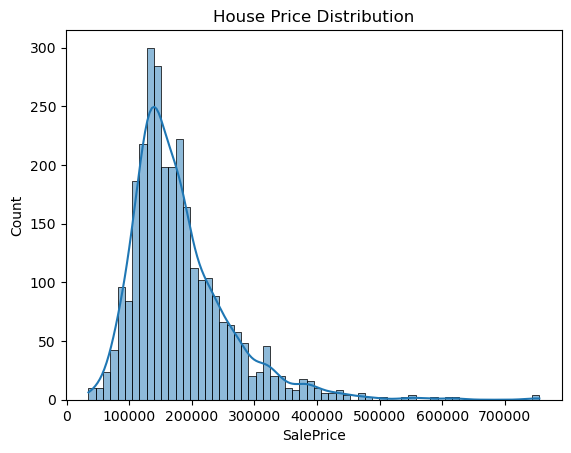

In [59]:
# developing a histogram using HISTPLOT, with SalePrice as x variable 
sns.histplot(data  = housing_df,
         x     = "SalePrice",
         kde   = True)


# title and axis labels
plt.title(label   = "House Price Distribution")
plt.xlabel(xlabel = "SalePrice") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

<h2> Analysis of the Histogram </h2>

- The graph demonstrates the house price distribution in our dataset. Most houses fall within the `$100000` to `$250000` range, as shown by the highest bars in this section. 
- The distribution is right-skewed, meaning there are fewer more expensive houses, but some of them are worth more than \$500000 . 
- The bars gradually decrease as prices go up, showing that expensive homes are much less common. 
- There is a clear peak in the lower price range, meaning that more affordable homes are much more common. 
- This visualization provides a clear overview of house prices, helping us recognize patterns in the dataset.

<br><h3>Missing Value Analysis and Imputation</h3>

In [20]:
# storing missing values proportions as a DataFrame
missing_df = housing_df.isnull().mean(axis = 0).round(decimals = 4).sort_values(ascending = False).head(n=20)
missing_df = missing_df.reset_index()
missing_df.columns = ['feature', "mv_proportion"]
missing_df.head(n=35)

,feature,mv_proportion
0,PoolQC,0.9952
1,MiscFeature,0.9630
2,Alley,0.9377
3,Fence,0.8075
4,MasVnrType,0.5973
5,FireplaceQu,0.4726
6,LotFrontage,0.1774
7,GarageFinish,0.0555
8,GarageCond,0.0555
9,GarageYrBlt,0.0555


In [21]:
# missing value lists
mv_max  = []
mv_hi   = []
mv_mid  = []
mv_low  = []


# grouping missing value proportions
for index, value in missing_df.iterrows():

    # features with mv proportion of 1.00
    if missing_df.loc[ index, 'mv_proportion' ] == 1.00:
        mv_max.append(missing_df.loc[ index, 'feature' ])

    # features with [0.67, 1.00) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] >= 0.67 and  missing_df.loc[ index, 'mv_proportion' ] < 1.00:
        mv_hi.append(missing_df.loc[ index, 'feature' ])


    # features with [0.33, 0.67) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] >= 0.33 and  missing_df.loc[ index, 'mv_proportion' ] < 0.67:
        mv_mid.append(missing_df.loc[ index, 'feature' ])


    # features with (0.0, 0.33) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] > 0.0 and  missing_df.loc[ index, 'mv_proportion' ] < 0.33:
        mv_low.append(missing_df.loc[ index, 'feature' ])

    # passing on features that have no missing values
    else:
        pass


# checking results
print(f"""

MV Proportions
--------------
 --------
| [1.00] |
 --------
{mv_max}

 --------------
| [0.67, 1.00) |
 --------------
{mv_hi}

 -------------
|[0.33, 0.67) |
 -------------
{mv_mid}

 ------------
| (0.0, 0.33) |
 ------------
{mv_low}
""")



MV Proportions
--------------
 --------
| [1.00] |
 --------
[]

 --------------
| [0.67, 1.00) |
 --------------
['PoolQC', 'MiscFeature', 'Alley', 'Fence']

 -------------
|[0.33, 0.67) |
 -------------
['MasVnrType', 'FireplaceQu']

 ------------
| (0.0, 0.33) |
 ------------
['LotFrontage', 'GarageFinish', 'GarageCond', 'GarageYrBlt', 'GarageQual', 'GarageType', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'Electrical']



In [22]:
# Dropping columns

housing_df.drop(labels  = ['GarageYrBlt'],
                 axis    = 1,
                 inplace = True)

In [23]:

# Define ordinal variables and their rankings
ordinal_mappings = {
                    "LotShape": ['IR3', 'IR2', 'IR1', 'Reg'],
                    "LandSlope": ['Sev', 'Mod', 'Gtl'],
                    "ExterQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "ExterCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "BsmtQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "BsmtCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "BsmtExposure": ['No', 'Mn', 'Av', 'Gd'],
                    "BsmtFinType1": ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                    "BsmtFinType2": ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                    "HeatingQC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "KitchenQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "FireplaceQu": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "GarageFinish": ['Unf', 'RFn', 'Fin'],
                    "GarageQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "GarageCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    "PavedDrive": ['N', 'P', 'Y'],
                    "Functional": ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                    "Utilities": ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
                    "Electrical": ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
                    "PoolQC": ['Fa', 'TA', 'Gd', 'Ex'],
                    "Fence": ['MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
}

# Handle missing values for ordinal variables
for col, categories in ordinal_mappings.items():
    if col in housing_df.columns:
        housing_df[col] = housing_df[col].astype(pd.CategoricalDtype(categories=categories, ordered=True))
        housing_df[col] = housing_df[col].cat.codes.replace(-1, None).fillna(-1)#.infer_objects(copy=False)  # Replace missing values with -1
        #pd.set_option('future.no_silent_downcasting', True)

# Binary encoding with missing value handling
binary_vars = {"CentralAir": {'Y': 1, 'N': 0}}

for col, mapping in binary_vars.items():
    if col in housing_df.columns:
        housing_df[col] = housing_df[col].map(mapping).fillna(0)  # Fill missing binary values with 0

# One-hot encoding for nominal variables with missing value handling
nominal_vars = ["LandContour", "LotConfig", "MasVnrType", "MSZoning", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
                "Exterior1st", "Exterior2nd", "Foundation", "Heating", "GarageType", "SaleType", "SaleCondition", "MSSubClass", "Street", "MiscFeature", "Alley"]
housing_df[nominal_vars] = housing_df[nominal_vars].fillna("Missing")  # Fill missing nominal values
housing_df = pd.get_dummies(housing_df, columns=nominal_vars, drop_first=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_28280\2450206647.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_df[col] = housing_df[col].cat.codes.replace(-1, None).fillna(-1)#.infer_objects(copy=False)  # Replace missing values with -1
C:\Users\Admin\AppData\Local\Temp\ipykernel_28280\2450206647.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_df[col] = housing_df[col].cat.codes.replace(-1, None).fillna(-1)#.infer_objects(copy=False)  # Replace missing values with -1
C:\Users\Admin\AppData\Local\Temp\ipykernel_28280\2450206647.py:

In [24]:
#Handling missing values for discrete variables in low_mv
housing_df[['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2']] = housing_df[['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2']].fillna(0)

In [25]:
#Forcing binary variables to a numerical type to avoid object type
bool_cols = housing_df.select_dtypes(include=['bool']).columns
housing_df[bool_cols] = housing_df[bool_cols].astype(int)

In [26]:
# storing missing values proportions as a DataFrame
missing_df = housing_df.isnull().mean(axis = 0).round(decimals = 4).sort_values(ascending = False).head(n=20)
missing_df = missing_df.reset_index()
missing_df.columns = ['feature', "mv_proportion"]
missing_df.head(n=5)

,feature,mv_proportion
0,Id,0.0
1,RoofMatl_WdShngl,0.0
2,Exterior1st_BrkComm,0.0
3,Exterior1st_BrkFace,0.0
4,Exterior1st_CBlock,0.0


In [27]:
#Checking the final structure of housing_df after imputation
housing_df.info()

#housing_df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Columns: 215 entries, Id to Alley_Pave
dtypes: float64(2), int32(155), int64(48), int8(9), object(1)
memory usage: 2.9+ MB


<h2> Data Preproccessing Insights </h2>

2.1. Missing Value Handling

-I performed missing value imputation using median values in continuous features, and mode or 'None' wherever required in categorical features.
- Alley, FireplaceQu, PoolQC, Fence, and MiscFeature had over 80% missing values 
- Hence I took a decision to eliminate these features.
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2 had missing values. Imputed as "No Basement" since missingness indicated no basement directly.Missing values for GarageYrBlt were imputed with 0 to represent no garage.
- Handling the missing values was very crucial as the dataset should be complete and free from any bias.

2.2. Encoding Categorical Variables

- Ordinal categorical variables (Example:  ExterQual, BsmtQual, KitchenQual) were label encoded since they possess an ordering (e.g., Excellent > Good > Fair > Poor).
- Nominal categorical variables (Example:  Neighborhood, HouseStyle, RoofStyle) were one-hot encoded to prevent misinterpretation as ordinal.
- Log transformations were applied on skewed features to normalize distributions and improve model performance.

2.3. Feature Scaling

- MinMax Scaling and Standardization were applied so that numerical features were scaled uniformly.
- Standardization was applied for features that were normally distributed (Example: SalePrice after log scaling).
- MinMax Scaling was applied where features were not normally distributed to scale values in range (0,1).


<br><h3>Feature Engineering</h3>

In [28]:
# FEATURE 1. Bath to Bed Ratio (Numerical)
total_baths = (housing_df['FullBath'] + 0.5 * housing_df['HalfBath'] +
               housing_df['BsmtFullBath'] + 0.5 * housing_df['BsmtHalfBath'])
housing_df['bath_to_bed_ratio'] = total_baths / housing_df['BedroomAbvGr'].replace(0, 1)

#FEATURE 2: Utilities Score

# Apply mappings to create numerical scores
housing_df['Utilities_Score'] = housing_df['Utilities']*0.12
housing_df['Street_Score'] = housing_df['Street_Pave']*0.06
housing_df['Electrical_Score'] = housing_df['Electrical']*0.17

# Create the overall infrastructure score by summing the three scores
housing_df['Infrastructure_Overall_Score'] = housing_df[['Utilities_Score', 'Street_Score', 'Electrical_Score']].sum(axis=1)
housing_df[["Infrastructure_Overall_Score"]].head()


# FEATURE 3 - Outdoor Living Score

# computing the total outdoor space(I have considered deck and garage area)
housing_df["TotalOutdoorSpace"] = housing_df["WoodDeckSF"] + housing_df["GarageArea"]+ housing_df["LotArea"]
#comparing and scoring based on the outdoorliving space vs the actual living space
housing_df["OutdoorLivingScore"] = housing_df["TotalOutdoorSpace"] / (housing_df["GrLivArea"] + 1)
#giving the outdoor living score and defining a function
def categorize_outdoor_living(score):
    if score <= 4:
        return "Low Outdoor Living"
    elif score <= 8:
        return "Moderate Outdoor Living"
    else:
        return "High Outdoor Living"

housing_df["OutdoorLivingCategory"] = housing_df["OutdoorLivingScore"].apply(categorize_outdoor_living)
housing_df[["OutdoorLivingScore", "OutdoorLivingCategory"]].head()

# FEATURE 4. Storage (Numerical)
housing_df['StorageArea'] = housing_df['GarageArea'] + housing_df['TotalBsmtSF']

# FEATURE 5. Building Age (Numerical)
housing_df['BuildingAge'] = housing_df['YrSold'] - housing_df['YearBuilt']

# FEATURE 6. Remodel Age (Numerical)
housing_df['RemodelAge'] = housing_df['YrSold'] - housing_df['YearRemodAdd']

# FEATURE 7. Room Spaciousness (Numerical)
housing_df['room_efficiency'] = housing_df['GrLivArea'] / housing_df['TotRmsAbvGrd']

# FEATURE 8. Is Remodeled (Categorical)
housing_df['is_remodeled'] = (housing_df['YearRemodAdd'] != housing_df['YearBuilt']).astype(int)

# FEATURE 9.  Appeal Score (Numerical)
housing_df['curb_appeal'] = (housing_df['ExterQual'] + housing_df['ExterCond']) / 2

# FEATURE 10. Season Sold (Categorical)
def get_season(mo):
    if mo in [3, 4, 5]:
        return 'Spring'
    elif mo in [6, 7, 8]:
        return 'Summer'
    elif mo in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply function to create season_sold column
housing_df['season_sold'] = housing_df['MoSold'].apply(get_season)

# Create dummy variables (dropping one as reference)
season_dummies = pd.get_dummies(housing_df['season_sold'], prefix='season', drop_first=True)

# Concatenate and drop original
housing_df = pd.concat([housing_df, season_dummies], axis=1)
housing_df = housing_df.drop('season_sold', axis=1)

##Binary Encoding For previously Zero inflated features (in this X = 0 in more than 32% of the observations ))##

# FEATURE 11. List of features that are zero inflated, add binaries for them
zero_inflated_features = [
    "PoolArea", "3SsnPorch", "LowQualFinSF", "MiscVal", "BsmtHalfBath",
    "ScreenPorch", "BsmtFinSF2", "EnclosedPorch", "HalfBath", "MasVnrArea",
    "BsmtFullBath", "2ndFlrSF", "WoodDeckSF", "Fireplaces", "OpenPorchSF", "BsmtFinSF1"
]

# Create binary columns for each feature (1 if value > 0, else 0)
for feature in zero_inflated_features:
    housing_df["has_" + feature] = (housing_df[feature] > 0).astype(int)

# FEATURE 12. Luxury Level (Numerical)

PoolAreaScore = housing_df['PoolArea']/1000
FireplacesScore = housing_df['has_Fireplaces']
WoodDeckScore = housing_df['has_WoodDeckSF']
MasVnrScore = housing_df['has_MasVnrArea']
MasVnrTypeScore = housing_df[['MasVnrType_BrkFace', 'MasVnrType_Missing', 'MasVnrType_None', 'MasVnrType_Stone']].sum(axis=1)
HasPorch = housing_df[['has_3SsnPorch', 'has_ScreenPorch', 'has_EnclosedPorch', 'has_OpenPorchSF']].sum(axis=1)
MiscValScore = housing_df['has_MiscVal']
CentralAir = housing_df['CentralAir']

# Final Luxury Score Calculation*
housing_df["LuxuryScore"] = (
PoolAreaScore * 0.15 + 
FireplacesScore * 0.10 + 
WoodDeckScore * 0.08 + 
MasVnrScore * 0.08 + 
MasVnrScore * 0.10 + 
CentralAir * 0.07 + 
HasPorch * 0.07 + 
MiscValScore * 0.15
)

# Display the first few rows
housing_df[["LuxuryScore"]].head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_28280\3144475168.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_df['bath_to_bed_ratio'] = total_baths / housing_df['BedroomAbvGr'].replace(0, 1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28280\3144475168.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  housing_df['Utilities_Score'] = housing_df['Utilities']*0.12
C:\Users\Admin\AppData\Local\Temp\ipykernel_28280\3144475168.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

KeyError: "['MasVnrType_None'] not in index"

In [29]:
housing_df = housing_df.drop(labels=['OutdoorLivingCategory'], axis=1)

In [30]:
#Checking the final structure of housing_df after feature engineering
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Columns: 247 entries, Id to has_BsmtFinSF1
dtypes: bool(3), float64(10), int32(172), int64(52), int8(9), object(1)
memory usage: 3.4+ MB


### Checking Engineered features correlation

In [31]:
# Resetting numeric_housing to account for the new variables
numeric_housing = housing_df.select_dtypes(include=['number'])

# Develop the correlation table
housing_corr = numeric_housing.corr(method='pearson')

# Filter correlations with SalePrice, round and sort
corr_series = housing_corr.loc[:, 'SalePrice'].round(2).sort_values(ascending=False)

# Convert the resulting Series to a DataFrame
corr_df = corr_series.reset_index().rename(columns={'index': 'feature', 'SalePrice': 'correlation'})

# Display the DataFrame
corr_df

,feature,correlation
0,SalePrice,1.00
1,OverallQual,0.79
2,GrLivArea,0.71
3,StorageArea,0.70
4,ExterQual,0.68
...,...,...
238,Foundation_CBlock,-0.34
239,GarageType_Detchd,-0.35
240,MasVnrType_Missing,-0.37
241,RemodelAge,-0.51


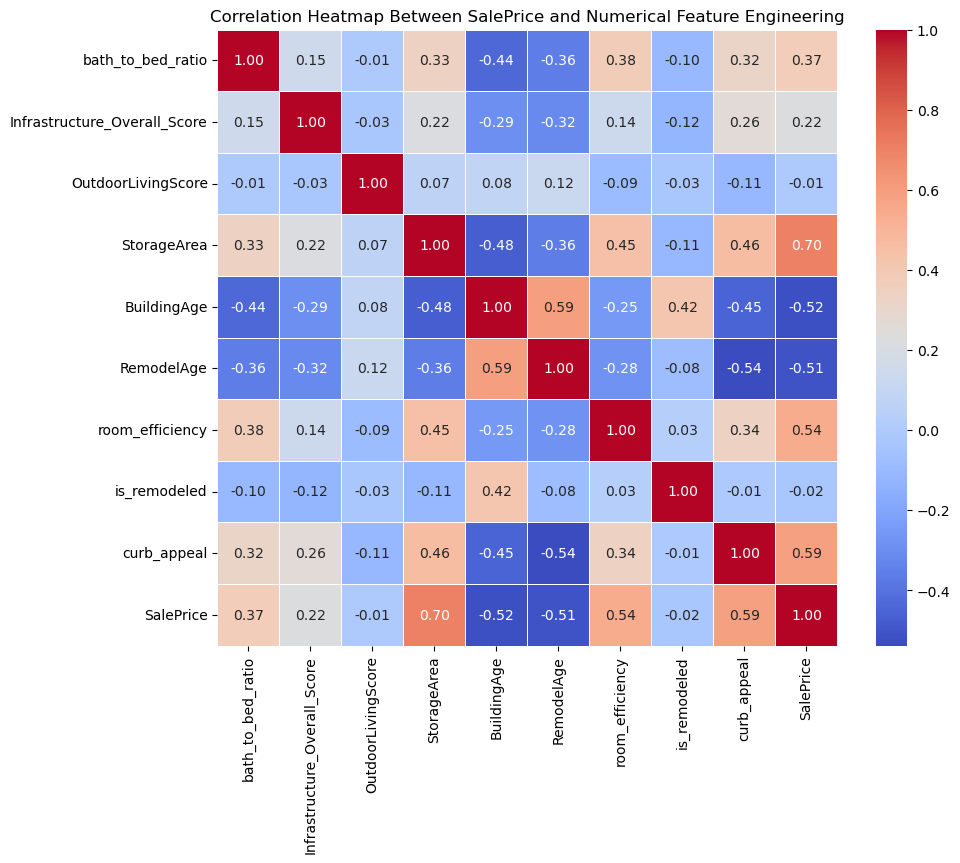

In [60]:
#building the heatmap that corelates the features with the sales price
# Selecting the columns of interest
features = [
    "bath_to_bed_ratio", "Infrastructure_Overall_Score", "OutdoorLivingScore",
     "StorageArea", "BuildingAge", "RemodelAge",
    "room_efficiency", "is_remodeled", "curb_appeal",  "SalePrice"
]

# Filtering only the desired columns
housing_df_filtered = housing_df[features]

# Calculating the correlation matrix
corr_matrix = housing_df_filtered.corr()

# Generating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between SalePrice and Numerical Feature Engineering")
plt.show()

<h2> Analysis of the Heatmap </h2>

- The heatmap above shows the correlation between SalePrice and several engineered features. 
- StorageArea is the feature with the highest positive correlation with SalePrice (0.70), meaning houses with more storage space tend to be more pricey. 
- Room efficiency and curb appeal show moderate positive correlations (0.54 and 0.59), which suggests that well-designed spaces and good exteriors lead to higher prices.
- BuildingAge and RemodelAge have negative correlations (-0.52 and -0.51), which means that homes that are older or haven't been updated in a while tend to sell for less. 
- Bath-to-bed ratio has a less positive correlation (0.37), suggesting that having more bathrooms than bedrooms may slightly raise the value of a home. 
- Is_remodeled has a very weak correlation with SalePrice (-0.02), which means whether a house has been remodeled or not does not significantly impact its price. 
- Other factors, such as the Infrastructure Score and the Outdoor Living Score, have weak connections, which means they may not have as much of an effect on the price.

<h2> Feature Engineering Insights </h2>

- Feature selection was performed to retain only the most important features and eliminate redundant or noisy features.
- In this analysis, I created 12 new features to improve our predictive model's quality for house prices. 
- These features were designed to measure key property attributes that affect home value, including size, quality, infrastructure, and luxury factors. Below is a brief explanation of each feature and its influence on my prediction.

**Bath to Bed Ratio (Numerical)**

This feature measures the number of bathrooms per bedroom, ensuring a functional home layout. More bathrooms relative to bedrooms generally mean higher home value.

**Infrastructure Score (Numerical)**

This feature combines utilities, street quality, and electrical system into one metric. Houses with better infrastructure usually worth more.

**Outdoor Living Score (Numerical)**

This feature compares total outdoor space (deck, garage, and lot) to indoor space. Buyers tend to favor homes with good outdoor living areas.

**Storage Area (Numerical)**

By adding up the room in the garage and basement, this feature shows homes that have more storage, which is a big selling point.

**Building Age (Numerical)**

This tells you how old the house is. Newer houses usually sell for more money because they are built more efficiently and need less maintenance.

**Remodel Age (Numerical)**

This measures years since the last remodel. Recent renovations tend to increase property value by making it more mordern.

**Room Spaciousness (Numerical)**

This divides the total living area by the number of rooms to measure space efficiency. People usually want homes with more space.

**Is Remodeled (Categorical)**

This binary indicator shows whether the house has been updated or not. Homes that have been fixed up tend to sell for more money.

**Season Sold (Categorical)**

This feature shows the season when the house was sold. Properties sold in Spring and Summer are generally of higher prices.

**Binary Features for Zero-Inflated Variables**

Some features, like pools, porches, and fireplaces, have a lot of zero values. Converting them into binary data helped us to improve model accuracy.

**Luxury Score (Numerical)**

This feature considers high-end features (pools, fireplaces, masonry veneer, porches, etc.) to figure out how luxurious it is overall. Prices tend to go up as scores go up.

<br><h3>Transformations</h3>

In [32]:
## Transformations ##

import numpy as np
import pandas as pd

# Capture the original numeric column names before adding new ones
original_numeric_cols = housing_df.select_dtypes(include=[np.number]).columns.tolist()

# Dictionary to hold the new columns
new_columns = {}

# Loop over only the original numeric columns
for col in original_numeric_cols:
    min_val = housing_df[col].min()
    # Shift if necessary to ensure the argument of np.log1p is > 0
    shift = (1 - min_val) if min_val <= -1 else 0
    new_columns[f'{col}_log'] = np.log1p(housing_df[col] + shift)
    new_columns[f'{col}_squared'] = housing_df[col] ** 2
    new_columns[f'{col}_std'] = (housing_df[col] - housing_df[col].mean()) / housing_df[col].std()

# Create a DataFrame from the new columns (ensuring the same index as housing_df)
new_columns_df = pd.DataFrame(new_columns, index=housing_df.index)

# Concatenate the new columns with the original DataFrame all at once
housing_df = pd.concat([housing_df, new_columns_df], axis=1)

# Optionally, defragment the DataFrame by making a copy
housing_df = housing_df.copy()

# Display the first rows
housing_df.head(5)


,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,has_WoodDeckSF_std,has_Fireplaces_log,has_Fireplaces_squared,has_Fireplaces_std,has_OpenPorchSF_log,has_OpenPorchSF_squared,has_OpenPorchSF_std,has_BsmtFinSF1_log,has_BsmtFinSF1_squared,has_BsmtFinSF1_std
0,1,65.0,8450,3,3,2,7,5,2003,2003,...,-0.958235,0.000000,0,-1.056201,0.693147,1,0.903128,0.693147,1,0.685661
1,2,80.0,9600,3,3,2,6,8,1976,1976,...,1.043228,0.693147,1,0.946466,0.000000,0,-1.106883,0.693147,1,0.685661
2,3,68.0,11250,2,3,2,7,5,2001,2002,...,-0.958235,0.693147,1,0.946466,0.693147,1,0.903128,0.693147,1,0.685661
3,4,60.0,9550,2,3,2,7,5,1915,1970,...,-0.958235,0.693147,1,0.946466,0.693147,1,0.903128,0.693147,1,0.685661
4,5,84.0,14260,2,3,2,8,5,2000,2000,...,1.043228,0.693147,1,0.946466,0.693147,1,0.903128,0.693147,1,0.685661


<br><h3>Standardization</h3>

In [33]:
## Standardization ##

# Create a copy of the original dataframe for standardization
housing_df_standardized = housing_df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Get all numeric columns 
numeric_columns = housing_df_standardized.select_dtypes(include=np.number).columns

# Loop through all numeric columns to apply standardization
for column in numeric_columns:
    # Reshape for sklearn compatibility (expects 2D array)
    values = housing_df_standardized[column].values.reshape(-1, 1)
    # Apply standardization (z-score normalization)
    standardized_values = scaler.fit_transform(values)
    # Update the dataframe with standardized values
    housing_df_standardized[column] = standardized_values

housing_df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Columns: 976 entries, Id to has_BsmtFinSF1_std
dtypes: bool(3), float16(9), float64(963), object(1)
memory usage: 21.5+ MB


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Step 3: Data Partitioning and Model Building</h2>

Before you start building candidate models, it's important to separate the training and testing sets that we combined earlier. Consistency across both sets has been achieved and label leakage has been minimized.

In [34]:
## separating training and testing sets ##

# dataset for model building
training_data = pd.DataFrame(data  = housing_df[ housing_df['set'] == 'Training' ].copy())

# dataset for kaggle submission
kaggle_data   = pd.DataFrame(data = housing_df[ housing_df['set'] == 'Testing'  ].copy())

# dropping set identifier (training set)
training_data.drop(labels = 'set',
                   axis = 1,
                   inplace = True)


# dropping set identifier (testing set)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)

kaggle_data.info()
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1460 to 2919
Columns: 975 entries, Id to has_BsmtFinSF1_std
dtypes: bool(3), float16(9), float64(497), int32(344), int64(104), int8(18)
memory usage: 8.7 MB
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Columns: 975 entries, Id to has_BsmtFinSF1_std
dtypes: bool(3), float16(9), float64(497), int32(344), int64(104), int8(18)
memory usage: 8.7 MB


In [35]:
log_columns = [col for col in training_data.columns if col.endswith('_log')]
squared_columns = [col for col in training_data.columns if col.endswith('_squared')]
scaled_columns = [col for col in training_data.columns if col.endswith('_std')]

# Original columns are those that do NOT end with any of the above suffixes.
original_columns = [col for col in training_data.columns 
                    if not col.endswith(('_log', '_squared', '_std'))]

# Create subset DataFrames
training_log = training_data[log_columns]
training_squared = training_data[squared_columns]
training_scaled = training_data[scaled_columns]
training_original = training_data[original_columns]

In [36]:
# sample set of x-features (just GrLivArea)

x_all = list(training_data.drop(labels=['SalePrice', 'Id','SalePrice_squared', 'Id_squared', 'SalePrice_log', 'Id_log', 'SalePrice_std', 'Id_std'], axis=1).columns)
x_original = list(training_original.drop(labels=['SalePrice', 'Id'], axis=1).columns)
x_SQ = list(training_squared.drop(labels=['SalePrice_squared', 'Id_squared'], axis=1).columns)
x_Log = list(training_log.drop(labels=['SalePrice_log', 'Id_log'], axis=1).columns)
x_Scaled = list(training_scaled.drop(labels=['SalePrice_std', 'Id_std'], axis=1).columns)

#Best X samples fo y orginial

x_all_best =['OverallQual_squared',
 'StorageArea_std',
 'GrLivArea_std',
 'BsmtQual_squared',
 'BsmtFinSF1_std',
 'Condition2_PosN_log',
 'OverallCond_log',
 'Condition2_PosN',
 'Condition2_PosN_squared',
 'Condition2_PosN_std',
 'OverallQual',
 'GrLivArea',
 'BsmtFinSF1_squared',
 'BsmtFinSF1',
 'OutdoorLivingScore_log',
 'MasVnrArea_squared',
 'KitchenQual_squared',
 'Fireplaces_std',
 'Neighborhood_StoneBr_std',
 'Neighborhood_NoRidge_std',
 'Neighborhood_Crawfor_std',
 'BsmtExposure_squared',
 'Neighborhood_NridgHt_std',
 'YearBuilt_squared',
 'SaleType_New_std',
 'StorageArea',
 'Fireplaces',
 'BsmtFinSF1_log',
 'KitchenAbvGr',
 'OverallQual_log',
 'Exterior1st_BrkFace_std',
 '2ndFlrSF_squared',
 'has_BsmtFinSF1_std',
 'BsmtQual',
 'Neighborhood_BrkSide',
 'Neighborhood_BrkSide_std',
 'BsmtQual_std',
 'RoofMatl_WdShngl_std',
 'Functional_log',
 'Condition1_Norm_std',
 'Condition1_Norm',
 'Condition1_Norm_log',
 'Condition1_Norm_squared',
 'BsmtFinSF2_squared',
 'SaleCondition_Normal',
 'SaleCondition_Normal_std',
 'SaleCondition_Normal_squared',
 'SaleCondition_Normal_log',
 'PoolArea_squared',
 'Neighborhood_Somerst_log',
 'Neighborhood_Somerst_std',
 'Neighborhood_Somerst',
 'Neighborhood_Somerst_squared',
 'has_BsmtFinSF1_log',
 'has_BsmtFinSF1',
 'has_BsmtFinSF1_squared',
 'Neighborhood_BrkSide_squared',
 'Neighborhood_BrkSide_log',
 'KitchenQual_std',
 'KitchenQual',
 'Street_Score_log',
 'Street_Score_std',
 'Street_Score_squared',
 'Street_Pave_log',
 'Street_Pave',
 'Street_Pave_squared',
 'Street_Score',
 'Street_Pave_std',
 'YearRemodAdd_squared']

x_original_best = [
    'OverallQual',
     'GrLivArea',
     'BsmtQual',
     'KitchenQual',
     'OutdoorLivingScore',
     'Neighborhood_NridgHt',
     'Neighborhood_NoRidge',
     'Neighborhood_StoneBr',
     'Condition2_PosN',
     'SaleType_New',
     'OverallCond',
     'BsmtExposure',
     'Neighborhood_Crawfor',
     'YearBuilt',
     'RoofMatl_WdShngl',
     'RoofMatl_CompShg',
     'RoofStyle_Gable',
     'KitchenAbvGr',
     'BldgType_TwnhsE',
     'bath_to_bed_ratio',
     'BldgType_Twnhs',
     'Neighborhood_Somerst',
     'Exterior1st_CemntBd',
     'MasVnrArea',
     'HouseStyle_1Story',
     'GarageCars',
     'Exterior1st_BrkFace',
     'Neighborhood_BrkSide',
     'LotConfig_CulDSac',
     'Condition1_Norm',
     'TotRmsAbvGrd',
     'has_MasVnrArea',
     'Fireplaces',
     'Functional',
     'Exterior2nd_ImStucc',
     'ExterQual',
     'RoofMatl_Tar&Grv',
     'RoofMatl_WdShake',
     'RoofMatl_Membran',
     'RoofMatl_Roll',
     'RoofMatl_Metal',
     'BsmtFinSF1',
     'room_efficiency',
     'StorageArea',
     'PoolArea',
     'SaleCondition_Normal',
     'Heating_OthW',
     'HouseStyle_2.5Fin'
    
]

x_Log_best= [
     'OverallQual_log',
     'GrLivArea_log',
     'ExterQual_log',
     'OutdoorLivingScore_log',
     'bath_to_bed_ratio_log',
     'Neighborhood_NridgHt_log',
     'Neighborhood_NoRidge_log',
     'BsmtExposure_log',
     'Neighborhood_StoneBr_log',
     'KitchenQual_log',
     'SaleType_New_log',
     'BsmtFinSF1_log',
     'RoofMatl_WdShngl_log',
     'Condition2_PosN_log',
     'RoofStyle_Hip_log',
     'BsmtQual_log',
     'Neighborhood_Crawfor_log',
     'MSSubClass_120_log',
     'HouseStyle_1Story_log',
     'KitchenAbvGr_log',
     'Functional_log',
     'Exterior1st_CemntBd_log',
     'Neighborhood_BrkSide_log',
     'RoofMatl_CompShg_log',
     'OverallCond_log',
     'YearBuilt_log',
     'TotRmsAbvGrd_log',
     'room_efficiency_log',
     'Neighborhood_Somerst_log',
     'Condition1_Norm_log',
     'Exterior1st_BrkFace_log',
     'is_remodeled_log',
     'GarageCars_log',
     'Exterior2nd_ImStucc_log',
     'GarageType_Missing_log',
     'LotConfig_CulDSac_log',
     'Fireplaces_log'
]

x_Scaled_best = [
     'OverallQual_std',
     'GrLivArea_std',
     'BsmtQual_std',
     'KitchenQual_std',
     'OutdoorLivingScore_std',
     'Neighborhood_NridgHt_std',
     'Neighborhood_NoRidge_std',
     'Neighborhood_StoneBr_std',
     'Condition2_PosN_std',
     'SaleType_New_std',
     'OverallCond_std',
     'BsmtExposure_std',
     'Neighborhood_Crawfor_std',
     'YearBuilt_std',
     'RoofMatl_WdShngl_std',
     'RoofMatl_CompShg_std',
     'RoofStyle_Gable_std',
     'KitchenAbvGr_std',
     'BldgType_TwnhsE_std',
     'bath_to_bed_ratio_std',
     'BldgType_Twnhs_std',
     'Neighborhood_Somerst_std',
     'Exterior1st_CemntBd_std',
     'MasVnrArea_std',
     'HouseStyle_1Story_std',
     'GarageCars_std',
     'Exterior1st_BrkFace_std',
     'Neighborhood_BrkSide_std',
     'LotConfig_CulDSac_std',
     'Condition1_Norm_std',
     'TotRmsAbvGrd_std',
     'has_MasVnrArea_std',
     'Fireplaces_std',
     'Functional_std',
     'Exterior2nd_ImStucc_std',
     'ExterQual_std',
     'RoofMatl_Tar&Grv_std',
     'RoofMatl_WdShake_std',
     'RoofMatl_Membran_std',
     'RoofMatl_Roll_std',
     'RoofMatl_Metal_std',
     'BsmtFinSF1_std',
     'room_efficiency_std',
     'StorageArea_std',
     'PoolArea_std',
     'SaleCondition_Normal_std',
     'Heating_OthW_std',
     'HouseStyle_2.5Fin_std'
]

#Best X samples for Y log target

x_all_best_Y =  [
    "OverallQual",
    "GrLivArea_log",
    "StorageArea",
    "TotalBsmtSF_squared",
    "BuildingAge_squared",
    "OverallCond_std",
    "TotalOutdoorSpace_log",
    "BsmtQual_squared",
    "BsmtFinSF1",
    "KitchenQual_squared",
    "Condition2_PosN_std",
    "Condition1_Norm_squared",
    "Neighborhood_Crawfor",
    "Functional_log",
    "Fireplaces_log",
    "Neighborhood_IDOTRR_std",
    "HeatingQC_std",
    "Exterior1st_BrkFace",
    "KitchenAbvGr_log",
    "Neighborhood_StoneBr",
    "SaleCondition_Normal_log",
    "SaleType_New",
    "BsmtFullBath_squared",
    "RemodelAge_squared",
    "Neighborhood_BrkSide",
    "Neighborhood_NoRidge_std",
    "Heating_Grav_std",
    "ScreenPorch",
    "Street_Score",
    "Street_Pave_squared",
    "Neighborhood_NridgHt_squared",
    "Neighborhood_Somerst",
    "Neighborhood_MeadowV_std",
    "PoolArea_squared",
    "Neighborhood_Edwards_squared",
    "Exterior1st_BrkComm_std",
    "MSZoning_RL_squared",
    "YearRemodAdd_squared",
]

x_original_best_Y = [
     'OverallQual',
     'GrLivArea',
     'BuildingAge',
     'StorageArea',
     'OverallCond',
     'Fireplaces',
     'GarageCars',
     'has_BsmtFullBath',
     'Condition2_PosN',
     'MSSubClass_160',
     'Condition1_Norm',
     'KitchenQual',
     'OutdoorLivingScore',
     'Neighborhood_Crawfor',
     'has_PoolArea',
     'PoolArea',
     'CentralAir',
     'SaleType_New',
     'SaleCondition_Normal',
     'Functional',
     'ScreenPorch',
     'Foundation_PConc',
     'Neighborhood_NridgHt',
     'Neighborhood_StoneBr',
     'Neighborhood_Somerst',
     'MSZoning_RL',
     'Neighborhood_Edwards',
     'MiscFeature_TenC',
     'Exterior1st_BrkFace',
     'HeatingQC',
     'BsmtExposure',
     'Street_Pave',
     'Street_Score',
     'Neighborhood_MeadowV',
     'WoodDeckSF',
     'EnclosedPorch',
     'Neighborhood_BrkSide',
     'MSSubClass_30',
     'has_BsmtFinSF1',
     'RemodelAge',
     'Neighborhood_NoRidge',
     'MSSubClass_120',
     'GarageFinish'
]

x_SQ_best_Y = [
     'OverallQual_squared',
     'GarageCars_squared',
     'MSZoning_RL_squared',
     'room_efficiency_squared',
     'TotRmsAbvGrd_squared',
     'CentralAir_squared',
     'has_BsmtFinSF1_squared',
     'GrLivArea_squared',
     'MSZoning_FV_squared',
     'has_Fireplaces_squared',
     'OverallCond_squared',
     'YearBuilt_squared',
     'OutdoorLivingScore_squared',
     'Neighborhood_Crawfor_squared',
     'Condition2_PosN_squared',
     'KitchenAbvGr_squared',
     'SaleType_New_squared',
     'SaleCondition_Normal_squared',
     'Condition1_Norm_squared',
     'Functional_squared',
     'Exterior1st_BrkFace_squared',
     'GarageType_Missing_squared',
     'FullBath_squared',
     'BsmtExposure_squared',
     'Foundation_Slab_squared',
     'HouseStyle_1Story_squared',
     'BsmtFinSF1_squared',
     'BldgType_TwnhsE_squared',
     'Neighborhood_NridgHt_squared',
     'LotConfig_CulDSac_squared',
     'MSSubClass_30_squared',
     'BldgType_Twnhs_squared',
     'Neighborhood_BrkSide_squared',
     'Foundation_PConc_squared',
     'has_ScreenPorch_squared',
     'WoodDeckSF_squared',
     'KitchenQual_squared',
     'Neighborhood_NoRidge_squared',
     'Neighborhood_StoneBr_squared',
     'MSZoning_RM_squared',
     'MSZoning_RH_squared',
     'SaleType_ConLD_squared',
     'HeatingQC_squared',
     'has_HalfBath_squared',
     'has_2ndFlrSF_squared',
     'BsmtQual_squared',
     'Neighborhood_MeadowV_squared',
     'GarageType_Attchd_squared',
     'Exterior1st_BrkComm_squared',
     'Heating_GasW_squared',
     'BsmtFullBath_squared',
     'EnclosedPorch_squared',
     'GarageQual_squared'
]

x_Log_best_Y = [
     'OverallQual_log',
     'GrLivArea_log',
     'YearBuilt_log',
     'TotalOutdoorSpace_log',
     'OverallCond_log',
     'bath_to_bed_ratio_log',
     'has_2ndFlrSF_log',
     'KitchenAbvGr_log',
     'Neighborhood_NridgHt_log',
     'GarageCars_log',
     'Neighborhood_Crawfor_log',
     'Functional_log',
     'BsmtFinSF1_log',
     'Condition2_PosN_log',
     'Neighborhood_BrkSide_log',
     'Condition1_Norm_log',
     'SaleType_New_log',
     'SaleCondition_Normal_log',
     'Neighborhood_StoneBr_log',
     'Neighborhood_NoRidge_log',
     'KitchenQual_log',
     'Neighborhood_Somerst_log',
     'BsmtExposure_log',
     'HeatingQC_log',
     'Exterior1st_BrkFace_log',
     'TotalBsmtSF_log',
     'MSZoning_RL_log',
     'RoofMatl_WdShngl_log',
     'Fireplaces_log',
     'YearRemodAdd_log',
     'Neighborhood_Edwards_log',
     'ScreenPorch_log',
     'TotRmsAbvGrd_log',
     'Neighborhood_IDOTRR_log',
     'Foundation_PConc_log',
     'Condition2_PosA_log',
     'has_BsmtFinSF1_log'
]

x_Scaled_best_Y = [
     'OverallQual_std',
     'GrLivArea_std',
     'BuildingAge_std',
     'StorageArea_std',
     'OverallCond_std',
     'Fireplaces_std',
     'GarageCars_std',
     'has_BsmtFullBath_std',
     'Condition2_PosN_std',
     'MSSubClass_160_std',
     'Condition1_Norm_std',
     'KitchenQual_std',
     'OutdoorLivingScore_std',
     'Neighborhood_Crawfor_std',
     'has_PoolArea_std',
     'PoolArea_std',
     'CentralAir_std',
     'SaleType_New_std',
     'SaleCondition_Normal_std',
     'Functional_std',
     'ScreenPorch_std',
     'Foundation_PConc_std',
     'Neighborhood_NridgHt_std',
     'Neighborhood_StoneBr_std',
     'Neighborhood_Somerst_std',
     'MSZoning_RL_std',
     'Neighborhood_Edwards_std',
     'MiscFeature_TenC_std',
     'Exterior1st_BrkFace_std',
     'HeatingQC_std',
     'BsmtExposure_std',
     'Street_Pave_std',
     'Street_Score_std',
     'Neighborhood_MeadowV_std',
     'WoodDeckSF_std',
     'EnclosedPorch_std',
     'Neighborhood_BrkSide_std',
     'MSSubClass_30_std',
     'has_BsmtFinSF1_std',
     'RemodelAge_std',
     'Neighborhood_NoRidge_std',
     'MSSubClass_120_std',
     'GarageFinish_std'
]

# setting_unflitered x data
x_data_all_g = training_data[ x_all]
x_data_g = training_data[ x_original ]
x_data_log_g = training_data[ x_Log ]
x_data_squared_g = training_data[ x_SQ ]
x_data_scaled_g = training_data[ x_Scaled ]


# setting x_data
x_data_all = training_data[ x_all_best ]
x_data = training_data[ x_original_best ]
x_data_log = training_data[ x_Log_best ]
#x_data_squared = training_data[ x_SQ_best ]
x_data_scaled = training_data[ x_Scaled_best ]

# setting log X data

x_data_all_y = training_data[ x_all_best_Y ]
x_data_y = training_data[ x_original_best_Y ]
x_data_log_y = training_data[ x_Log_best_Y ]
x_data_squared_y = training_data[ x_SQ_best_Y ]
x_data_scaled_y = training_data[ x_Scaled_best_Y ]

# engineering y-variables
y_data      = training_data[ 'SalePrice' ]
log_y_data  = np.log(training_data[ 'SalePrice' ])
SQ_y_data  = training_data[ 'SalePrice' ]**2


In [37]:
## Stepwise Selection for OLS Regression ##
def ols_stepwise_selection(x_data,
                           y_data, 
                           initial_list  = [], 
                           threshold_in  = 0.01, 
                           threshold_out = 0.05, 
                           verbose       = True):
    """
    Perform a forward-backward feature selection based on p-values from statsmodels.api.OLS.

    Arguments:
        x_data : pandas.DataFrame
            DataFrame with candidate features.
        y_data : array-like
            The target variable.
        initial_list : list
            List of features (column names of x) to start with.
        threshold_in : float
            Include a feature if its p-value < threshold_in.
        threshold_out : float
            Exclude a feature if its p-value > threshold_out.
        verbose : bool
            Whether to print the sequence of inclusions and exclusions.

    Returns:
        list
            The list of selected features.

    Note: Always set threshold_in < threshold_out to avoid infinite loops.
    """

    # required imports
    import statsmodels.api as sm
    import pandas as pd


    # setting placeholer list
    included = list(initial_list)


    # looping over each x-feature until there are no more significant p-values
    while True:
        changed = False

        # forward step: adding an x-feature
        excluded = [col for col in x_data.columns if col not in included]
        new_pvals = pd.Series(dtype = float, index = excluded)


        # fitting model with additional candidate feature
        for new_column in excluded:

            model = sm.OLS(y_data,
                           sm.add_constant(x_data[included + [new_column]])).fit()

            new_pvals[new_column] = model.pvalues[new_column]


        if not new_pvals.empty:
            best_pval = new_pvals.min()
            if best_pval < threshold_in:
                best_feature = new_pvals.idxmin()  # Use idxmin() instead of argmin()
                included.append(best_feature)
                changed = True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))


        # backward step: potentially removing an x-feature
        if included:
            model = sm.OLS(y_data, sm.add_constant(x_data[included])).fit()

            # excluding intercept p-value (first element)
            pvals = model.pvalues.iloc[1:]

            # ensuring the model is not empty
            if not pvals.empty:
                worst_pval = pvals.max()
                if worst_pval > threshold_out:
                    worst_feature = pvals.idxmax()  # Use idxmax() instead of argmax()
                    included.remove(worst_feature)
                    changed = True
                    if verbose:
                        print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))


        # stopping the loop if optimized
        if not changed:
            break


    # returning stepwise model's x-features
    return included

In [38]:
## All X Features ##

#ols_stepwise_selection(x_data_all,
                       #y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

## Best X_orginal Features ##

#ols_stepwise_selection(x_data,
                       #y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

## Best X_SQ Features ##

#ols_stepwise_selection(x_data_squared,
                       #sqrt_y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

## Best X_log Features ##
#ols_stepwise_selection(x_data_log,
                       #y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

## Best X_scaled Features ##

#ols_stepwise_selection(X_data_scaled,
                       #y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

In [39]:
## Best X_all Features for Y_Log ##

#ols_stepwise_selection(X_data_all,
                       #log_y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

## Best X_original Features for Y_Log ##

#ols_stepwise_selection(x_data,
                       #log_y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

## Best X_log Features for Y_Log ##

#ols_stepwise_selection(x_data_log,
                       #log_y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

## Best X_SQ Features for Y_Log ##

#ols_stepwise_selection(x_data_squared,
                       #log_y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

## Best X_scaled Features for Y_Log ##

#ols_stepwise_selection(X_data_scaled,
                       #log_y_data, 
                       #initial_list  = [], 
                       #threshold_in  = 0.01, 
                       #threshold_out = 0.05, 
                       #verbose       = True)

<br>

In [40]:
## Model Instantiation and Fitting ##

# picking a model name
#model_name = "Linear Regression"


# INSTANTIATING and FITTING model objects
#model      = sklearn.linear_model.LinearRegression().fit(x_data, y_data)
#log_model  = sklearn.linear_model.LinearRegression().fit(x_data, log_y_data)
#sqrt_model = sklearn.linear_model.LinearRegression().fit(x_data, sqrt_y_data)

# checking R-Squared values
#print(f'Original Units: {round(model.score(x_data, y_data), ndigits = 4)}')
#print(f'Logarithmic Units: {round(log_model.score(x_data, log_y_data), ndigits = 4)}')
#print(f'Square Rooted Units: {round(sqrt_model.score(x_data, sqrt_y_data), ndigits = 4)}')

# Additional Output: RMSE for each model
#from sklearn.metrics import mean_squared_error

#print(f'Original Units RMSE: {round(mean_squared_error(y_data, model.predict(x_data), squared=False), ndigits=4)}')
#print(f'Logarithmic Units RMSE: {round(mean_squared_error(log_y_data, log_model.predict(x_data), squared=False), ndigits=4)}')
#print(f'Square Rooted Units RMSE: {round(mean_squared_error(sqrt_y_data, sqrt_model.predict(x_data), squared=False), ndigits=4)}')

In [ ]:
y_test = kaggle_data['SalePrice']

In [ ]:
x_test = kaggle_data[x_all_best]

# INSTANTIATING model objects
model_01 = sklearn.linear_model.LinearRegression()
model_02 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_03 = sklearn.linear_model.Lasso (alpha = 0.5, max_iter = 100000)
model_04 = sklearn.linear_model.SGDRegressor()

# FITTING to training data
model01_fit = model_01.fit(x_data_all, y_data)
model02_fit = model_02.fit(x_data_all, y_data)
model03_fit = model_03.fit(x_data_all, y_data)
model04_fit = model_04.fit(x_data_all, y_data)


# PREDICTING on new data
model01_pred = model_01.predict(x_test)
model02_pred = model_02.predict(x_test)
model03_pred = model_03.predict(x_test)
model04_pred = model_04.predict(x_test)

#Calculating the RMSE for Models
rmse_model01 = np.sqrt(mean_squared_error(y_test, model01_pred))
rmse_model02 = np.sqrt(mean_squared_error(y_test, model02_pred))
rmse_model03 = np.sqrt(mean_squared_error(y_test, model03_pred))
rmse_model04 = np.sqrt(mean_squared_error(y_test, model04_pred))

print(rmse_model01)
print(rmse_model02)
print(rmse_model03)
print(rmse_model04)

In [43]:
 x_test  = kaggle_data[x_original_best]

# INSTANTIATING model objects
model_1 = sklearn.linear_model.LinearRegression()
model_2 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_3 = sklearn.linear_model.Lasso (alpha = 0.7, max_iter = 100000)
model_4 = sklearn.linear_model.SGDRegressor()


# FITTING to training data
model1_fit = model_1.fit(x_data, y_data)
model2_fit = model_2.fit(x_data, y_data)
model3_fit = model_3.fit(x_data, y_data)
model4_fit = model_4.fit(x_data, y_data)


# PREDICTING on new data
model1_pred = model_1.predict(x_test)
model2_pred = model_2.predict(x_test)
model3_pred = model_3.predict(x_test)
model4_pred = model_4.predict(x_test)

from sklearn.metrics import mean_squared_error
import numpy as np

# calculating the RMSE for the model
rmse_model1 = np.sqrt(mean_squared_error(y_test, model1_pred))
rmse_model2 = np.sqrt(mean_squared_error(y_test, model2_pred))
rmse_model3 = np.sqrt(mean_squared_error(y_test, model3_pred))
rmse_model4 = np.sqrt(mean_squared_error(y_test, model4_pred))

print(rmse_model1)
print(rmse_model2)
print(rmse_model3)
print(rmse_model4)

24209.743251368927
27079.386701500553
24211.04115221031
1926377814644287.8


In [44]:
x_test  = kaggle_data[x_Log_best]

# INSTANTIATING model objects
model_5 = sklearn.linear_model.LinearRegression()
model_6 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_7 = sklearn.linear_model.Lasso (alpha = 0.7, max_iter = 100000)
model_8 = sklearn.linear_model.SGDRegressor()


# FITTING to training data
model5_fit = model_5.fit(x_data_log, y_data)
model6_fit = model_6.fit(x_data_log, y_data)
model7_fit = model_7.fit(x_data_log, y_data)
model8_fit = model_8.fit(x_data_log, y_data)


# PREDICTING on new data
model5_pred = model_5.predict(x_test)
model6_pred = model_6.predict(x_test)
model7_pred = model_7.predict(x_test)
model8_pred = model_8.predict(x_test)

# calculating the RMSE for the model
rmse_model5 = np.sqrt(mean_squared_error(y_test, model5_pred))
rmse_model6 = np.sqrt(mean_squared_error(y_test, model6_pred))
rmse_model7 = np.sqrt(mean_squared_error(y_test, model7_pred))
rmse_model8 = np.sqrt(mean_squared_error(y_test, model8_pred))

print(rmse_model5)
print(rmse_model6)
print(rmse_model7)
print(rmse_model8)

29062.303966403666
30129.08878881828
29064.475531142263
33508.86742016621


In [45]:
x_test  = kaggle_data[x_Scaled_best]

# INSTANTIATING model objects
model_9 = sklearn.linear_model.LinearRegression()
model_10 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_11 = sklearn.linear_model.Lasso (alpha = 0.5, max_iter = 100000)
model_12 = sklearn.linear_model.SGDRegressor()

# FITTING to training data
model9_fit = model_9.fit(x_data_scaled, y_data)
model10_fit = model_10.fit(x_data_scaled, y_data)
model11_fit = model_11.fit(x_data_scaled, y_data)
model12_fit = model_12.fit(x_data_scaled, y_data)


# PREDICTING on new data
model9_pred = model_9.predict(x_test)
model10_pred = model_10.predict(x_test)
model11_pred = model_11.predict(x_test)
model12_pred = model_12.predict(x_test)

# calculating the RMSE for the model
rmse_model9 = np.sqrt(mean_squared_error(y_test, model9_pred))
rmse_model10 = np.sqrt(mean_squared_error(y_test, model10_pred))
rmse_model11 = np.sqrt(mean_squared_error(y_test, model11_pred))
rmse_model12 = np.sqrt(mean_squared_error(y_test, model12_pred))

print(rmse_model9)
print(rmse_model10)
print(rmse_model11)
print(rmse_model12)

24209.74325136891
24226.73354351671
24209.74856793042
25947.950532628267


**With log Y**

In [46]:
y_test = kaggle_data['SalePrice_log']

In [47]:
x_test  = kaggle_data[x_all_best_Y]

# INSTANTIATING model objects
model_13 = sklearn.linear_model.LinearRegression()
model_14 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_15 = sklearn.linear_model.Lasso (alpha = 0.7, max_iter = 100000)
model_16 = sklearn.linear_model.SGDRegressor()


# FITTING to training data
model13_fit = model_13.fit(x_data_all_y, log_y_data)
model14_fit = model_14.fit(x_data_all_y, log_y_data)
model15_fit = model_15.fit(x_data_all_y, log_y_data)
model16_fit = model_16.fit(x_data_all_y, log_y_data)


# PREDICTING on new data
model13_pred = model_13.predict(x_test)
model14_pred = model_14.predict(x_test)
model15_pred = model_15.predict(x_test)
model16_pred = model_16.predict(x_test)

#  calculating the RMSE for the model
rmse_model13 = np.sqrt(mean_squared_error(y_test, model13_pred))
rmse_model14 = np.sqrt(mean_squared_error(y_test, model14_pred))
rmse_model15 = np.sqrt(mean_squared_error(y_test, model15_pred))
rmse_model16 = np.sqrt(mean_squared_error(y_test, model16_pred))

print(rmse_model13)
print(rmse_model14)
print(rmse_model15)
print(rmse_model16)

0.11112549369147373
0.11116277980686114
0.22961185837376474
5.83137168093156e+21


In [48]:
x_test  = kaggle_data[x_original_best_Y]

# INSTANTIATING model objects
model_17 = sklearn.linear_model.LinearRegression()
model_18 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_19 = sklearn.linear_model.Lasso (alpha = 0.3, max_iter = 100000)
model_20 = sklearn.linear_model.SGDRegressor()

# FITTING to training data
model17_fit = model_17.fit(x_data_y, log_y_data)
model18_fit = model_18.fit(x_data_y, log_y_data)
model19_fit = model_19.fit(x_data_y, log_y_data)
model20_fit = model_20.fit(x_data_y, log_y_data)


# PREDICTING on new data
model17_pred = model_17.predict(x_test)
model18_pred = model_18.predict(x_test)
model19_pred = model_19.predict(x_test)
model20_pred = model_20.predict(x_test)

#  calculating the RMSE for the model
rmse_model17 = np.sqrt(mean_squared_error(y_test, model17_pred))
rmse_model18 = np.sqrt(mean_squared_error(y_test, model18_pred))
rmse_model19 = np.sqrt(mean_squared_error(y_test, model19_pred))
rmse_model20 = np.sqrt(mean_squared_error(y_test, model20_pred))

print(rmse_model17)
print(rmse_model18)
print(rmse_model19)
print(rmse_model20)

0.11755901892505857
0.1221284770612391
0.1870612176987522
4115203330139272.0


In [49]:
x_test  = kaggle_data[x_Log_best_Y]

# INSTANTIATING model objects
model_21 = sklearn.linear_model.LinearRegression()
model_22 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_23 = sklearn.linear_model.Lasso (alpha = 0.5, max_iter = 100000)
model_24 = sklearn.linear_model.SGDRegressor()


# FITTING to training data
model21_fit = model_21.fit(x_data_log_y, log_y_data)
model22_fit = model_22.fit(x_data_log_y, log_y_data)
model23_fit = model_23.fit(x_data_log_y, log_y_data)
model24_fit = model_24.fit(x_data_log_y, log_y_data)


# PREDICTING on new data
model21_pred = model_21.predict(x_test)
model22_pred = model_22.predict(x_test)
model23_pred = model_23.predict(x_test)
model24_pred = model_24.predict(x_test)


#  calculating the RMSE for the model
rmse_model21 = np.sqrt(mean_squared_error(y_test, model21_pred))
rmse_model22 = np.sqrt(mean_squared_error(y_test, model22_pred))
rmse_model23 = np.sqrt(mean_squared_error(y_test, model23_pred))
rmse_model24 = np.sqrt(mean_squared_error(y_test, model24_pred))

print(rmse_model21)
print(rmse_model22)
print(rmse_model23)
print(rmse_model24)

0.11694210908692912
0.12148460544795357
0.39931245224667766
0.16474277107303123


In [50]:
x_test  = kaggle_data[x_SQ_best_Y]

# INSTANTIATING model objects
model_25 = sklearn.linear_model.LinearRegression()
model_26 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_27 = sklearn.linear_model.Lasso (alpha = 0.9, max_iter = 100000)
model_28 = sklearn.linear_model.SGDRegressor()


# FITTING to training data
model25_fit = model_25.fit(x_data_squared_y, log_y_data)
model26_fit = model_26.fit(x_data_squared_y, log_y_data)
model27_fit = model_27.fit(x_data_squared_y, log_y_data)
model28_fit = model_28.fit(x_data_squared_y, log_y_data)


# PREDICTING on new data
model25_pred = model_25.predict(x_test)
model26_pred = model_26.predict(x_test)
model27_pred = model_27.predict(x_test)
model28_pred = model_28.predict(x_test)

#  calculating the RMSE for the model
rmse_model25 = np.sqrt(mean_squared_error(y_test, model25_pred))
rmse_model26 = np.sqrt(mean_squared_error(y_test, model26_pred))
rmse_model27 = np.sqrt(mean_squared_error(y_test, model27_pred))
rmse_model28 = np.sqrt(mean_squared_error(y_test, model28_pred))

print(rmse_model25)
print(rmse_model26)
print(rmse_model27)
print(rmse_model28)

0.11340955602855901
0.11404710056274892
0.21047473096506664
1.5586630254972237e+22


In [51]:
x_test  = kaggle_data[x_Scaled_best_Y]

# INSTANTIATING model objects
model_29 = sklearn.linear_model.LinearRegression()
model_30 = sklearn.linear_model.Ridge(alpha = 1.0, solver ='auto')
model_31 = sklearn.linear_model.Lasso ()
model_32 = sklearn.linear_model.SGDRegressor()


# FITTING to training data
model29_fit = model_29.fit(x_data_scaled_y, log_y_data)
model30_fit = model_30.fit(x_data_scaled_y, log_y_data)
model31_fit = model_31.fit(x_data_scaled_y, log_y_data)
model32_fit = model_32.fit(x_data_scaled_y, log_y_data)


# PREDICTING on new data
model29_pred = model_29.predict(x_test)
model30_pred = model_30.predict(x_test)
model31_pred = model_31.predict(x_test)
model32_pred = model_32.predict(x_test)

# calculating the RMSE for the model
rmse_model29 = np.sqrt(mean_squared_error(y_test, model29_pred))
rmse_model30 = np.sqrt(mean_squared_error(y_test, model30_pred))
rmse_model31 = np.sqrt(mean_squared_error(y_test, model31_pred))
rmse_model32 = np.sqrt(mean_squared_error(y_test, model32_pred))

print(rmse_model29)
print(rmse_model30)
print(rmse_model31)
print(rmse_model32)

0.11755898211062273
0.11758918546722155
0.39931245224667766
0.12840261045130366


In [52]:
rmse_no_log = [rmse_model01, rmse_model02, rmse_model03, rmse_model04, rmse_model1, rmse_model2, rmse_model3, rmse_model4,
    rmse_model5, rmse_model6, rmse_model7, rmse_model8,
    rmse_model9, rmse_model10, rmse_model11, rmse_model12]

rmse_log = [rmse_model13, rmse_model14, rmse_model15, rmse_model16,
    rmse_model17, rmse_model18, rmse_model19, rmse_model20,
    rmse_model21, rmse_model22, rmse_model23, rmse_model24,
    rmse_model25, rmse_model26, rmse_model27, rmse_model28,
    rmse_model29, rmse_model30, rmse_model31, rmse_model32]

import numpy as np

import numpy as np

model_names_no_log = [
    "LinearRegression_01", "Ridge Regression_02", "Lasso Regression_03", "SGDRegressor_04",
    "LinearRegression_1", "Ridge Regression_2", "Lasso Regression_3", "SGDRegressor_4",
    "LinearRegression_5", "Ridge Regression_6", "Lasso Regression_7", "SGDRegressor_8",
    "LinearRegression_9", "Ridge Regression_10", "Lasso Regression_11", "SGDRegressor_12"
]

model_names_log = [
    "LinearRegression_13", "Ridge Regression_14", "Lasso Regression_15", "SGDRegressor_16",
    "LinearRegression_17", "Ridge Regression_18", "Lasso Regression_19", "SGDRegressor_20",
    "LinearRegression_21", "Ridge Regression_22", "Lasso Regression_23", "SGDRegressor_24",
    "LinearRegression_25", "Ridge Regression_26", "Lasso Regression_27", "SGDRegressor_28",
    "LinearRegression_29", "Ridge Regression_30", "Lasso Regression_31", "SGDRegressor_32"
]

# Store the X and Y variables used for each model
x_vars_no_log = ["x_data_scaled_y"] * len(model_names_no_log)  # Adjust if different per model
y_vars_no_log = ["y_data"] * len(model_names_no_log)

x_vars_log = ["x_data_scaled_y"] * len(model_names_log)
y_vars_log = ["log_y_data"] * len(model_names_log)

# Find the best model in rmse_no_log list
min_rmse_no_log = min(rmse_no_log)
best_index_no_log = rmse_no_log.index(min_rmse_no_log)
best_model_no_log = model_names_no_log[best_index_no_log]
best_x_no_log = x_vars_no_log[best_index_no_log]
best_y_no_log = y_vars_no_log[best_index_no_log]

best_model_no_log_pred = globals()[f"model{best_index_no_log + 1}_pred"]  # Retrieve prediction variable dynamically


# Find the best model in rmse_log list
min_rmse_log = min(rmse_log)
best_index_log = rmse_log.index(min_rmse_log)
best_model_log = model_names_log[best_index_log]
best_x_log = x_vars_log[best_index_log]
best_y_log = y_vars_log[best_index_log]

best_model_log_pred = globals()[f"model{best_index_log + 1 + 12}_pred"]  # Retrieve prediction variable dynamically


# Print results
print("Best Model (No Log Target):")
print(f"  Model: {best_model_no_log}")
print(f"  X Variable: {best_x_no_log}")
print(f"  Y Variable: {best_y_no_log}")
print(f"  RMSE: {min_rmse_no_log:.4f}\n")

print("Best Model (Log-Transformed Target):")
print(f"  Model: {best_model_log}")
print(f"  X Variable: {best_x_log}")
print(f"  Y Variable: {best_y_log}")
print(f"  RMSE: {min_rmse_log:.4f}")


Best Model (No Log Target):
  Model: Lasso Regression_03
  X Variable: x_data_scaled_y
  Y Variable: y_data
  RMSE: 22841.3808

Best Model (Log-Transformed Target):
  Model: LinearRegression_13
  X Variable: x_data_scaled_y
  Y Variable: log_y_data
  RMSE: 0.1111


<br>

In [53]:
# Storing results in a DataFrame
predictions = pd.DataFrame({
    f'{best_model_no_log}_pred': best_model_no_log_pred,
    f'{best_model_log}_pred': best_model_log_pred
})

# Checking results
predictions.head(n=5)

,Lasso Regression_03_pred,LinearRegression_13_pred
0,208521.083612,12.251138
1,187263.020335,12.089795
2,213299.501394,12.323590
3,182859.131435,12.091519
4,302957.345036,12.660489


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Step 4: Inversing Prediction Transformations</h2><br>

In [55]:
## Inverse Transformations ##
inv_predictions = pd.DataFrame({
    f"{best_model_no_log}_pred": best_model_no_log_pred,
    f"{best_model_log}_pred": np.exp(best_model_log_pred)})

# Checking results
inv_predictions.head(n=5)

,Lasso Regression_03_pred,LinearRegression_13_pred
0,208521.083612,209219.297146
1,187263.020335,178045.535736
2,213299.501394,224940.181210
3,182859.131435,178352.877279
4,302957.345036,315050.856986


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Step 5: Preparing Submission File for Kaggle</h2><br>


In [56]:
# Saving predictions with their respective IDs from the test set
predictions = pd.DataFrame(data={
    'Id': housing_test['Id'],
    'SalePrice': inv_predictions[f"{best_model_no_log}_pred"]  # Use the best model's prediction column
})

# Checking the results
predictions.head(n=5)

,Id,SalePrice
0,1,208521.083612
1,2,187263.020335
2,3,213299.501394
3,4,182859.131435
4,5,302957.345036


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Finally, we save the DataFrame as a .csv file and we're ready to submit. This file will be available in Output > /kaggle/working > submission.csv.

In [58]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'submission.csv',
                   index = False)

# Model Defense

There are two main steps that I used to build my prediction framework. The first step is to make the model more accurate. The second step is to reduce the risks of overfitting and choosing the wrong features. This method's main goal is to find the best predictor variables and transformation methods in a planned way before using a lot of different models. This way, I can be sure that the models will work well and make accurate predictions.

**Step 1: Choosing features and look at how they change**

* In the first step of my structure, I chose features one by one. I looked at all the predictor factors in the training set and see how they relate to the target variable, which could be SalePrice (y) or log-transformed SalePrice (log\_y).
* In order to do this, I used the p-value-based statistical significance testing to make sure that my models only include the most important factors.
* Adding multiple transformations for predictor variables, like logarithmic, squared, and other nonlinear transformations, is a key improvement to my feature selection method.
* It looks at each transformation on its own, which makes several groups of the best predictor factors.
* By using different feature subsets and transformations, I have made a modeling system that is more stable and doesn't favor one transformation method over another.

**Step 2: Putting the model into action and compare the RMSE**

* Once the features were chosen, I used 32 different models that include:

Different kinds of linear regression models:

* Ordinary Least Squares.

* Ridge Regression (Ridge)

* Lasso Regression

* Stochastic Gradient Descent

* The Root Mean Squared Error (RMSE) of each model was used to judge how well it can predict the future. All of the models' results were saved, which lets them be compared in a structured way. For final forecasts on the test data, the model with the lowest RMSE was chosen.

* Also it uses log transformed variables, which have the benefit of curbing the effects of skewness all while allowing for predicted values to be easily reverted back to original units with a simple exponential calculation.

* Compared to models based on scaled values, it is more interpretable and given the very important skewness numbers observed for some of the variables during EDA is likely to be less error prone than a non-log based model.

**Dealing with the TT Gap**

* One known problem with the dataset is that the train set doesn't have any SalePrice data, which means that the train-test gap (TT gap) can't be directly checked.
* But my method makes up for this by using a number of changes and checking out a number of different modeling approaches. In addition, I used outside factors that can be used to make predictions, like trends, to improve accuracy even more.

<h2>Special Feature : Seasonality as a Key Factor in Setting Sales Prices & Why Seasonality Should Be Included. </h2>

My model is one of a kind because it includes a timing factor that takes into account how house prices change with the seasons because of changes in supply and demand.
This variable is very impactful for house pricing as supply and demand shift seasonally. By adding a season-sold variable, I hope to catch these effects and make the model better at predicting price changes that depend on time.

**Using the season-sold feature:**

In order to add timing to my model, I put each house sale into one of four seasons based on the month in which it happened.
This is done with the help of the following function from my notebook:

*FEATURE 10. Season Sold (Categorical)*

*def get\_season(mo):*

```
if mo in [3, 4, 5]:

    return 'Spring'
    
elif mo in [6, 7, 8]:

    return 'Summer'
    
elif mo in [9, 10, 11]:

    return 'Fall'
    
else:

    return 'Winter'*
    
```

*Apply function to create season\_sold column*

housing\_df\['season\_sold'] = housing\_df\['MoSold'].apply(get\_season)

*To make the season\_sold column, use the following function:*

housing\_df\['season\_sold'] = housing\_df\['MoSold'].Put in (get\_season)

**How the seasonality feature helps with the Sales Price Estimation:**

By using this feature you can check :

* Spring and Summer Price Surge: More transactions because more people are buying. The weather is good when moving and visiting people's homes. Family-oriented purchases are driven by school plans, which increases demand.

* Fall and Winter Slowdowns: Fewer deals happen because people wait to buy things because of the holidays and the cold weather. When demand goes down, prices go down, and buyers have more power in negotiations. If the price is lower, sellers may be more eager to close the deal.

So to conclude it, to make sure that I have the best possible prediction performance, my system includes a strong feature selection mechanism and an exhaustive modeling process. By adding "seasonality as a categorical feature," the model is much better able to "account for market fluctuations," which makes price predictions more accurate. I made a very useful and general tool for predicting real estate values by carefully comparing multiple models and using domain-specific knowledge to minimize prediction errors while avoiding overfitting.